## **AIRFARE PRICE PREDICTION USING XGB REGRESSOR**

**STEP 1: PROBLEM STATEMENT**

Predicting flight ticket costs can often seem like a shot in the dark; one day the prices are one thing, and the next, they've shifted entirely. It's a common refrain among travelers about the erratic nature of airfare pricing. However, as data scientists, we stand by the belief that with the correct data, predictability is within reach. In this context, we will equip you with the ticket prices for different airlines from March to June 2019, covering a range of cities. Training and test data are provided. Please ensure to import Data_Train and Test_set xlsx files into a folder called sample_data.

**STEP 2: IMPORTING AND PREPROCESSING THE DATA**

In [50]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from joblib import dump
from joblib import load
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from math import sqrt

In [51]:
train_data = pd.read_excel('sample_data/Data_Train.xlsx')
test_data=pd.read_excel('sample_data/Test_set.xlsx')

In [32]:
train_data.shape,test_data.shape

((10683, 11), (2671, 10))

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
#checking for null values in these two datasets
train_data.isnull().values.any(),test_data.isnull().values.any()

(True, False)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [52]:
#dropping null values
train_data.dropna(inplace=True)

In [4]:
#checking duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [53]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [ ]:
train_data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [54]:
#No info and No Info are the same
train_data["Additional_Info"] = train_data["Additional_Info"].apply(lambda x: 'No info' if x == 'No Info' else x)

In [55]:
# Converting duration to minutes in both test and train data
def duration_convert(duration):
    parts = duration.split()
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    return minutes

train_data['Duration'] = train_data['Duration'].apply(duration_convert)
test_data['Duration'] = test_data['Duration'].apply(duration_convert)

In [56]:
# Extracting only day and month for date fields and hour and min for time fields

def extract_datefield(df):
    # Convert 'Date_of_Journey' to datetime object
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
    df['Journey_day'] = df['Date_of_Journey'].dt.day
    df['Journey_month'] = df['Date_of_Journey'].dt.month
    df.drop('Date_of_Journey', axis=1, inplace=True)


def extract_timefield(df):
    # Convert 'Dep_Time' to datetime object
    df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
    df['Dep_hour'] = df['Dep_Time'].dt.hour
    df['Dep_min'] = df['Dep_Time'].dt.minute
    df.drop('Dep_Time', axis=1, inplace=True)

    # Convert 'Arrival_Time' to datetime object
    df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'].apply(lambda x: x.split()[0]))
    df['Arrival_hour'] = df['Arrival_Time'].dt.hour
    df['Arrival_min'] = df['Arrival_Time'].dt.minute
    df.drop('Arrival_Time', axis=1, inplace=True)

# Apply functions to both train and test datasets
extract_datefield(train_data)
extract_timefield(train_data)

extract_datefield(test_data)
extract_timefield(test_data)

**STEP 3: VISUALIZING AND PREPARING THE DATA**

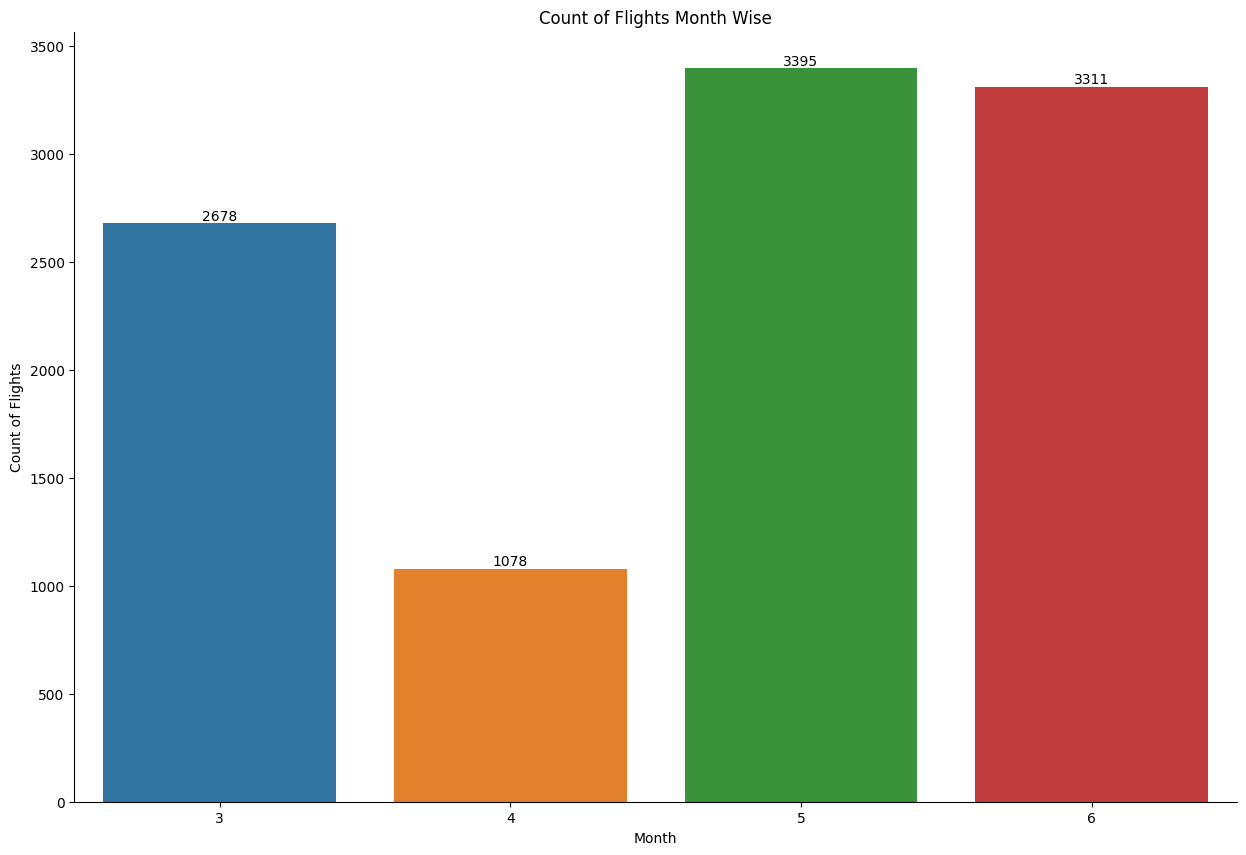

In [9]:
plt.figure(figsize=(15, 10))
plt.title('Count of Flights Month Wise')
ax = sns.countplot(x='Journey_month', data=train_data)
plt.xlabel('Month')
plt.ylabel('Count of Flights')
ax.bar_label(ax.containers[0])
sns.despine()
plt.show()

In [57]:
#Total stops string representation is changed to numerical representation
stops = {'1 stop': 1, 'non-stop': 0, '2 stops': 2, '3 stops': 3, '4 stops': 4}

def stops_replace(data):
    data['Total_Stops'].replace(stops, inplace=True)

stops_replace(train_data)
stops_replace(test_data)

In [11]:
#Analyzing Airline value counts
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [58]:
#4 Flights have negligible amount of flights, hence grouping them as Other
train_data["Airline"].replace({'Multiple carriers Premium economy':'Other',
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },
                                        inplace=True)

test_data["Airline"].replace({'Multiple carriers Premium economy':'Other',
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },
                                        inplace=True)

In [13]:
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [59]:
#The last 5 Additional info has very less number of value counts hence clustering them as Other
train_data["Additional_Info"].replace({'Change airports':'Other',
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',
                                                   },
                                        inplace=True)
test_data["Additional_Info"].replace({'Change airports':'Other',
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',
                                                   },
                                        inplace=True)

In [60]:
# Define categorical columns
categorical_cols = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Total_Stops']

# Create and fit a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    train_data[col] = encoder.fit_transform(train_data[col])
    label_encoders[col] = encoder  # Save encoder to the dictionary

# Save the fitted LabelEncoders to separate files
for col, encoder in label_encoders.items():
    dump(encoder, f'{col}_encoder.joblib')

# Prepare feature matrices and target vector- Route is not needed as it is redundant
X = train_data.drop(columns=['Price','Route'])
y = train_data['Price']

**STEP 4: TRAINING THE MODEL**

In [14]:
!pip install xgboost

In [61]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the sizes of the train and test datasets
print(f"The size of training input is {X_train.shape}")
print(f"The size of training output is {y_train.shape}")
print(f"The size of testing input is {X_test.shape}")
print(f"The size of testing output is {y_test.shape}")

The size of training input is (7323, 12)
The size of training output is (7323,)
The size of testing input is (3139, 12)
The size of testing output is (3139,)


In [63]:
# Parameters for tuning
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500],
    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
}



In [64]:
# Initializing and fitting the RandomizedSearchCV with the XGBRegressor
xgb_model = XGBRegressor()
# Initialize and fit RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=20, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Save the best model from RandomizedSearchCV
dump(random_search.best_estimator_, 'xgb_model.joblib')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


['xgb_model.joblib']

In [65]:
train_predictions = random_search.best_estimator_.predict(X_train)
test_predictions = random_search.best_estimator_.predict(X_test)

In [66]:
# Printing the results for both train and test sets
print("Train Results for XGBoost Regressor Model:")
train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
train_mape = calculate_mape(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
print(f"Root mean squared error: {train_rmse}")
print(f"Mean absolute % error: {train_mape}")
print(f"R-squared: {train_r2}")

print("Test Results for XGBoost Regressor Model:")
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
test_mape = calculate_mape(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f"Root mean squared error: {test_rmse}")
print(f"Mean absolute % error: {test_mape}")
print(f"R-squared: {test_r2}")

Train Results for XGBoost Regressor Model:
Root mean squared error: 1131.5765684341056
Mean absolute % error: 8.790689200051343
R-squared: 0.9408561519266881
Test Results for XGBoost Regressor Model:
Root mean squared error: 1654.2081702139608
Mean absolute % error: 10.868973389825822
R-squared: 0.8682431169135738


**STEP 6: EXPORTING THE ENCODERS**

In [67]:
dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']